In [21]:
%matplotlib notebook
import matplotlib.pyplot as plt
from data_set import ParamSpec, DB, new_data_set
from sqlite_base import new_experiment, connect

In [22]:
conn = connect(DB, debug=True)

In [23]:
new_experiment(conn, "majo", "rocks")

BEGIN 

    INSERT INTO experiments
        (name, sample_name, start_time, format_string, run_counter)
    VALUES
        ('majo','rocks',1499727161.52456,'{}-{}-{}',0)
    
COMMIT


7

In [24]:
parameter_a = ParamSpec("a", "INTEGER")
# metadata with key="value", and number=1
parameter_b = ParamSpec("b", "INTEGER", key="value", number=1)

In [25]:
# cann add new parameter: an array
parameter_c = ParamSpec("c", "array")

In [26]:
dataSet = new_data_set("test")
dataSet

test #17@/Users/unga/Desktop/experiment.db
------------------------------------------

In [27]:
dataSet.add_parameters([parameter_a, parameter_b, parameter_c])

In [28]:
dataSet

test #17@/Users/unga/Desktop/experiment.db
------------------------------------------
a - INTEGER
b - INTEGER
c - array

In [29]:
dataSet.add_result({"a":1})

1

In [30]:
dataSet.get_data("a")

[[1]]

In [31]:
dataSet

test #17@/Users/unga/Desktop/experiment.db
------------------------------------------
a - INTEGER
b - INTEGER
c - array

# x-y loop example

In [32]:
dataSet = new_data_set("test", specs=[ParamSpec("x", "number"), ParamSpec("y", "number")], metadata={"so":"meta"})

In [33]:
dataSet.exp_id

7

In [34]:
dataSet.add_metadata("more", "meta")

In [35]:
for x in range(100):
    y = 3*x + 10
    dataSet.add_result({"x":x, "y":y})

<IPython.core.display.Javascript object>


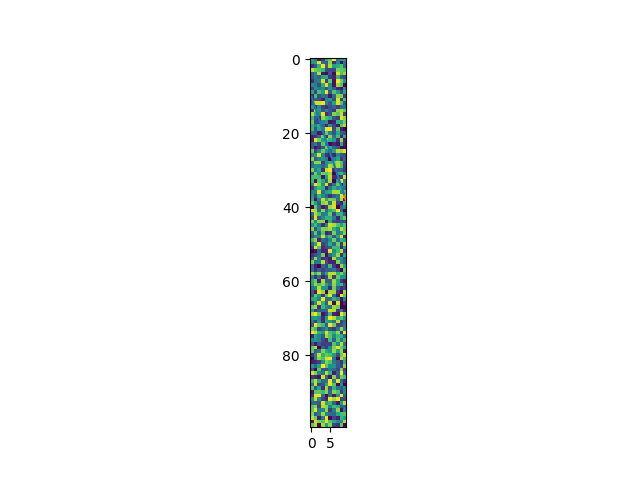

In [36]:
plt.plot(dataSet.get_data("x") , dataSet.get_data("y"))
plt.plot(dataSet.get_data("x", start=10) , dataSet.get_data("y", start=10))
plt.plot(dataSet.get_data("x", start=20, end=30) , dataSet.get_data("y", start=20, end=30))

# x-y (array) loop example

In [37]:
import numpy as np

In [38]:
dataSet = new_data_set("test", specs=[ParamSpec("x", "number"), ParamSpec("y", "array")])

In [39]:
for x in range(100):
    dataSet.add_result({"x":x, "y":np.random.random_sample(10)})

In [40]:
plt.imshow(np.concatenate(dataSet.get_data("y")))